In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import gc
import glob
import os
import random
import time
from datetime import date, datetime
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn import model_selection
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
datapath = os.path.join('E:\DATA','IDS2017dataset.csv')
full_data=pd.read_csv(datapath)

##check if data_train has both attack (1) and normal (0) flows 
print(full_data['Label'].value_counts())


0    667378
1    379737
Name: Label, dtype: int64


In [4]:
#Split data into features (X) and target label(Y)
X=full_data.iloc[:,:-1] #gets elements of array but the last one ####features
Y=full_data.iloc[:,-1] ### label

In [5]:
# iterating the columns with their indices
for idx ,col in enumerate(full_data.columns): 
    print("Feature"+ " " +str(idx) + " " + str(col))

Feature 0  Flow Duration
Feature 1  Total Fwd Packets
Feature 2  Total Backward Packets
Feature 3 Total Length of Fwd Packets
Feature 4  Total Length of Bwd Packets
Feature 5  Fwd Packet Length Max
Feature 6  Fwd Packet Length Min
Feature 7  Fwd Packet Length Mean
Feature 8  Fwd Packet Length Std
Feature 9 Bwd Packet Length Max
Feature 10  Bwd Packet Length Min
Feature 11  Bwd Packet Length Mean
Feature 12  Bwd Packet Length Std
Feature 13 Flow Bytes/s
Feature 14  Flow Packets/s
Feature 15  Flow IAT Mean
Feature 16  Flow IAT Std
Feature 17  Flow IAT Max
Feature 18  Flow IAT Min
Feature 19 Fwd IAT Total
Feature 20  Fwd IAT Mean
Feature 21  Fwd IAT Std
Feature 22  Fwd IAT Max
Feature 23  Fwd IAT Min
Feature 24 Bwd IAT Total
Feature 25  Bwd IAT Mean
Feature 26  Bwd IAT Std
Feature 27  Bwd IAT Max
Feature 28  Bwd IAT Min
Feature 29 Fwd PSH Flags
Feature 30  Bwd PSH Flags
Feature 31  Fwd URG Flags
Feature 32  Bwd URG Flags
Feature 33 Fwd Header Length
Feature 34  Bwd Header Length
Feature 3

In [7]:
shap.initjs()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Training data', X_train.shape, 'Test data', X_test.shape)


Training data (732980, 76) Test data (314135, 76)


In [12]:
d_train = lgb.Dataset(X_train, label=Y_train)
d_test = lgb.Dataset(X_test, label=Y_test)

In [13]:
# LGB parameters:
params = {'learning_rate': 0.05,
          'boosting': 'gbdt', 
          'objective': 'binary',
          'num_leaves': 2000,
          'min_data_in_leaf': 200,
          'max_bin': 200,
          'max_depth': 16,
          'seed': 2018,
          'nthread': 10,}


# LGB training:
lgb_model = lgb.train(params, d_train, 
                      num_boost_round=1000, 
                      valid_sets=(d_test,), 
                      valid_names=('valid',), 
                      verbose_eval=25, 
                      early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds
[25]	valid's binary_logloss: 0.145318
[50]	valid's binary_logloss: 0.0419416
[75]	valid's binary_logloss: 0.0132778
[100]	valid's binary_logloss: 0.00474069
[125]	valid's binary_logloss: 0.00219966
[150]	valid's binary_logloss: 0.00137507
[175]	valid's binary_logloss: 0.00112767
[200]	valid's binary_logloss: 0.00104785
[225]	valid's binary_logloss: 0.00102347
[250]	valid's binary_logloss: 0.00102199
Early stopping, best iteration is:
[246]	valid's binary_logloss: 0.00101994


In [18]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')

In [14]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


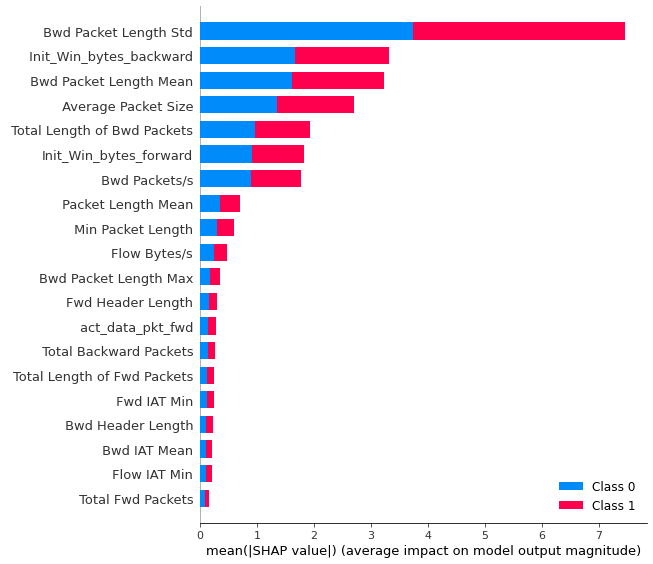

In [15]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

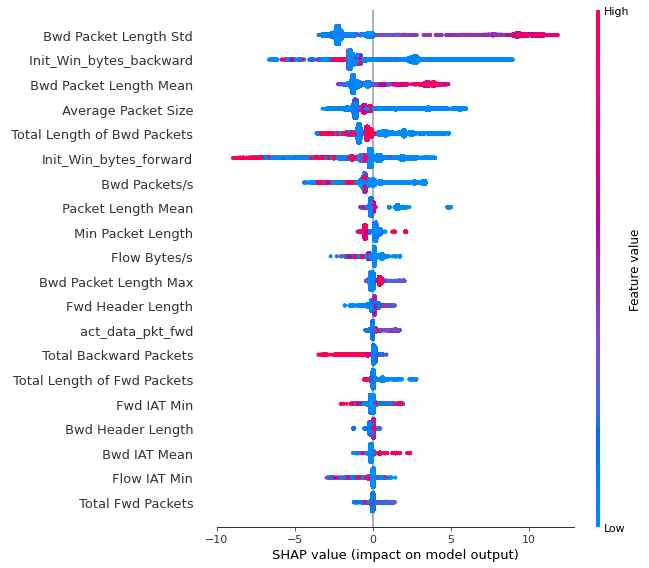

In [16]:
# Plot summary_plot based on attack
shap.summary_plot(shap_values[1], X_importance)

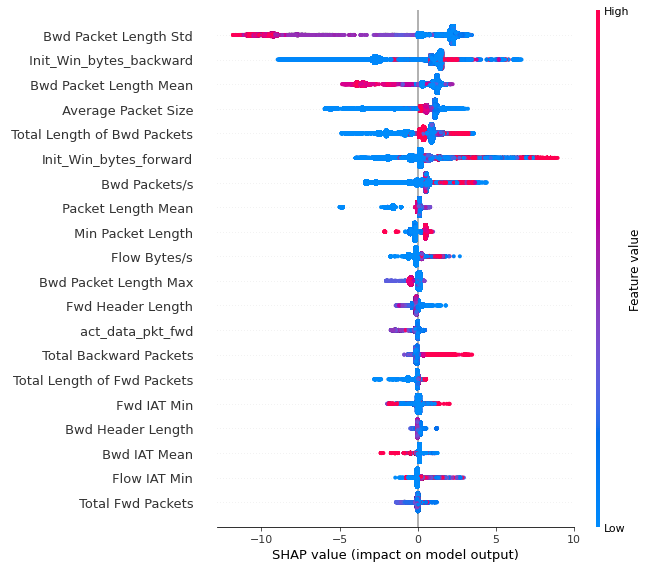

In [17]:
# Plot summary_plot based on benign
shap.summary_plot(shap_values[0], X_importance)

In [52]:
full_data.columns[0:76].tolist()

[' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK 

In [54]:
shap_sum.tolist()

[[0.012242937933544163,
  0.027620187975466243,
  0.06992188697143832,
  0.07206458553262282,
  1.6968318777739468,
  0.49089878926257097,
  0.31823089517098857,
  0.06220846460853186,
  0.2104043676759191,
  0.05369109391761198,
  0.3025914622703257,
  1.354252427795082,
  2.287659332489993,
  0.03644898672385113,
  0.026458772538958085,
  0.21105777339989878,
  0.26225544125209904,
  0.005338874516638512,
  0.3103391406306572,
  0.05124314484474912,
  0.010583280508326442,
  0.00571139623782314,
  0.006774289764879053,
  0.183625737297709,
  0.0024746365356979804,
  0.44929168565867467,
  0.026533758007852935,
  0.1219844186851669,
  0.038920510652448434,
  0.00020721359317751916,
  0.0,
  0.0,
  0.0,
  0.15890854016943737,
  0.17252002304960085,
  0.029013169219865242,
  0.5989080208030896,
  0.6263664901997175,
  0.010466081755933162,
  0.08072626003479282,
  0.03376788937254165,
  0.03413920566397847,
  0.036405084536054136,
  0.0,
  0.0,
  0.0011713367199912047,
  0.0029911104861

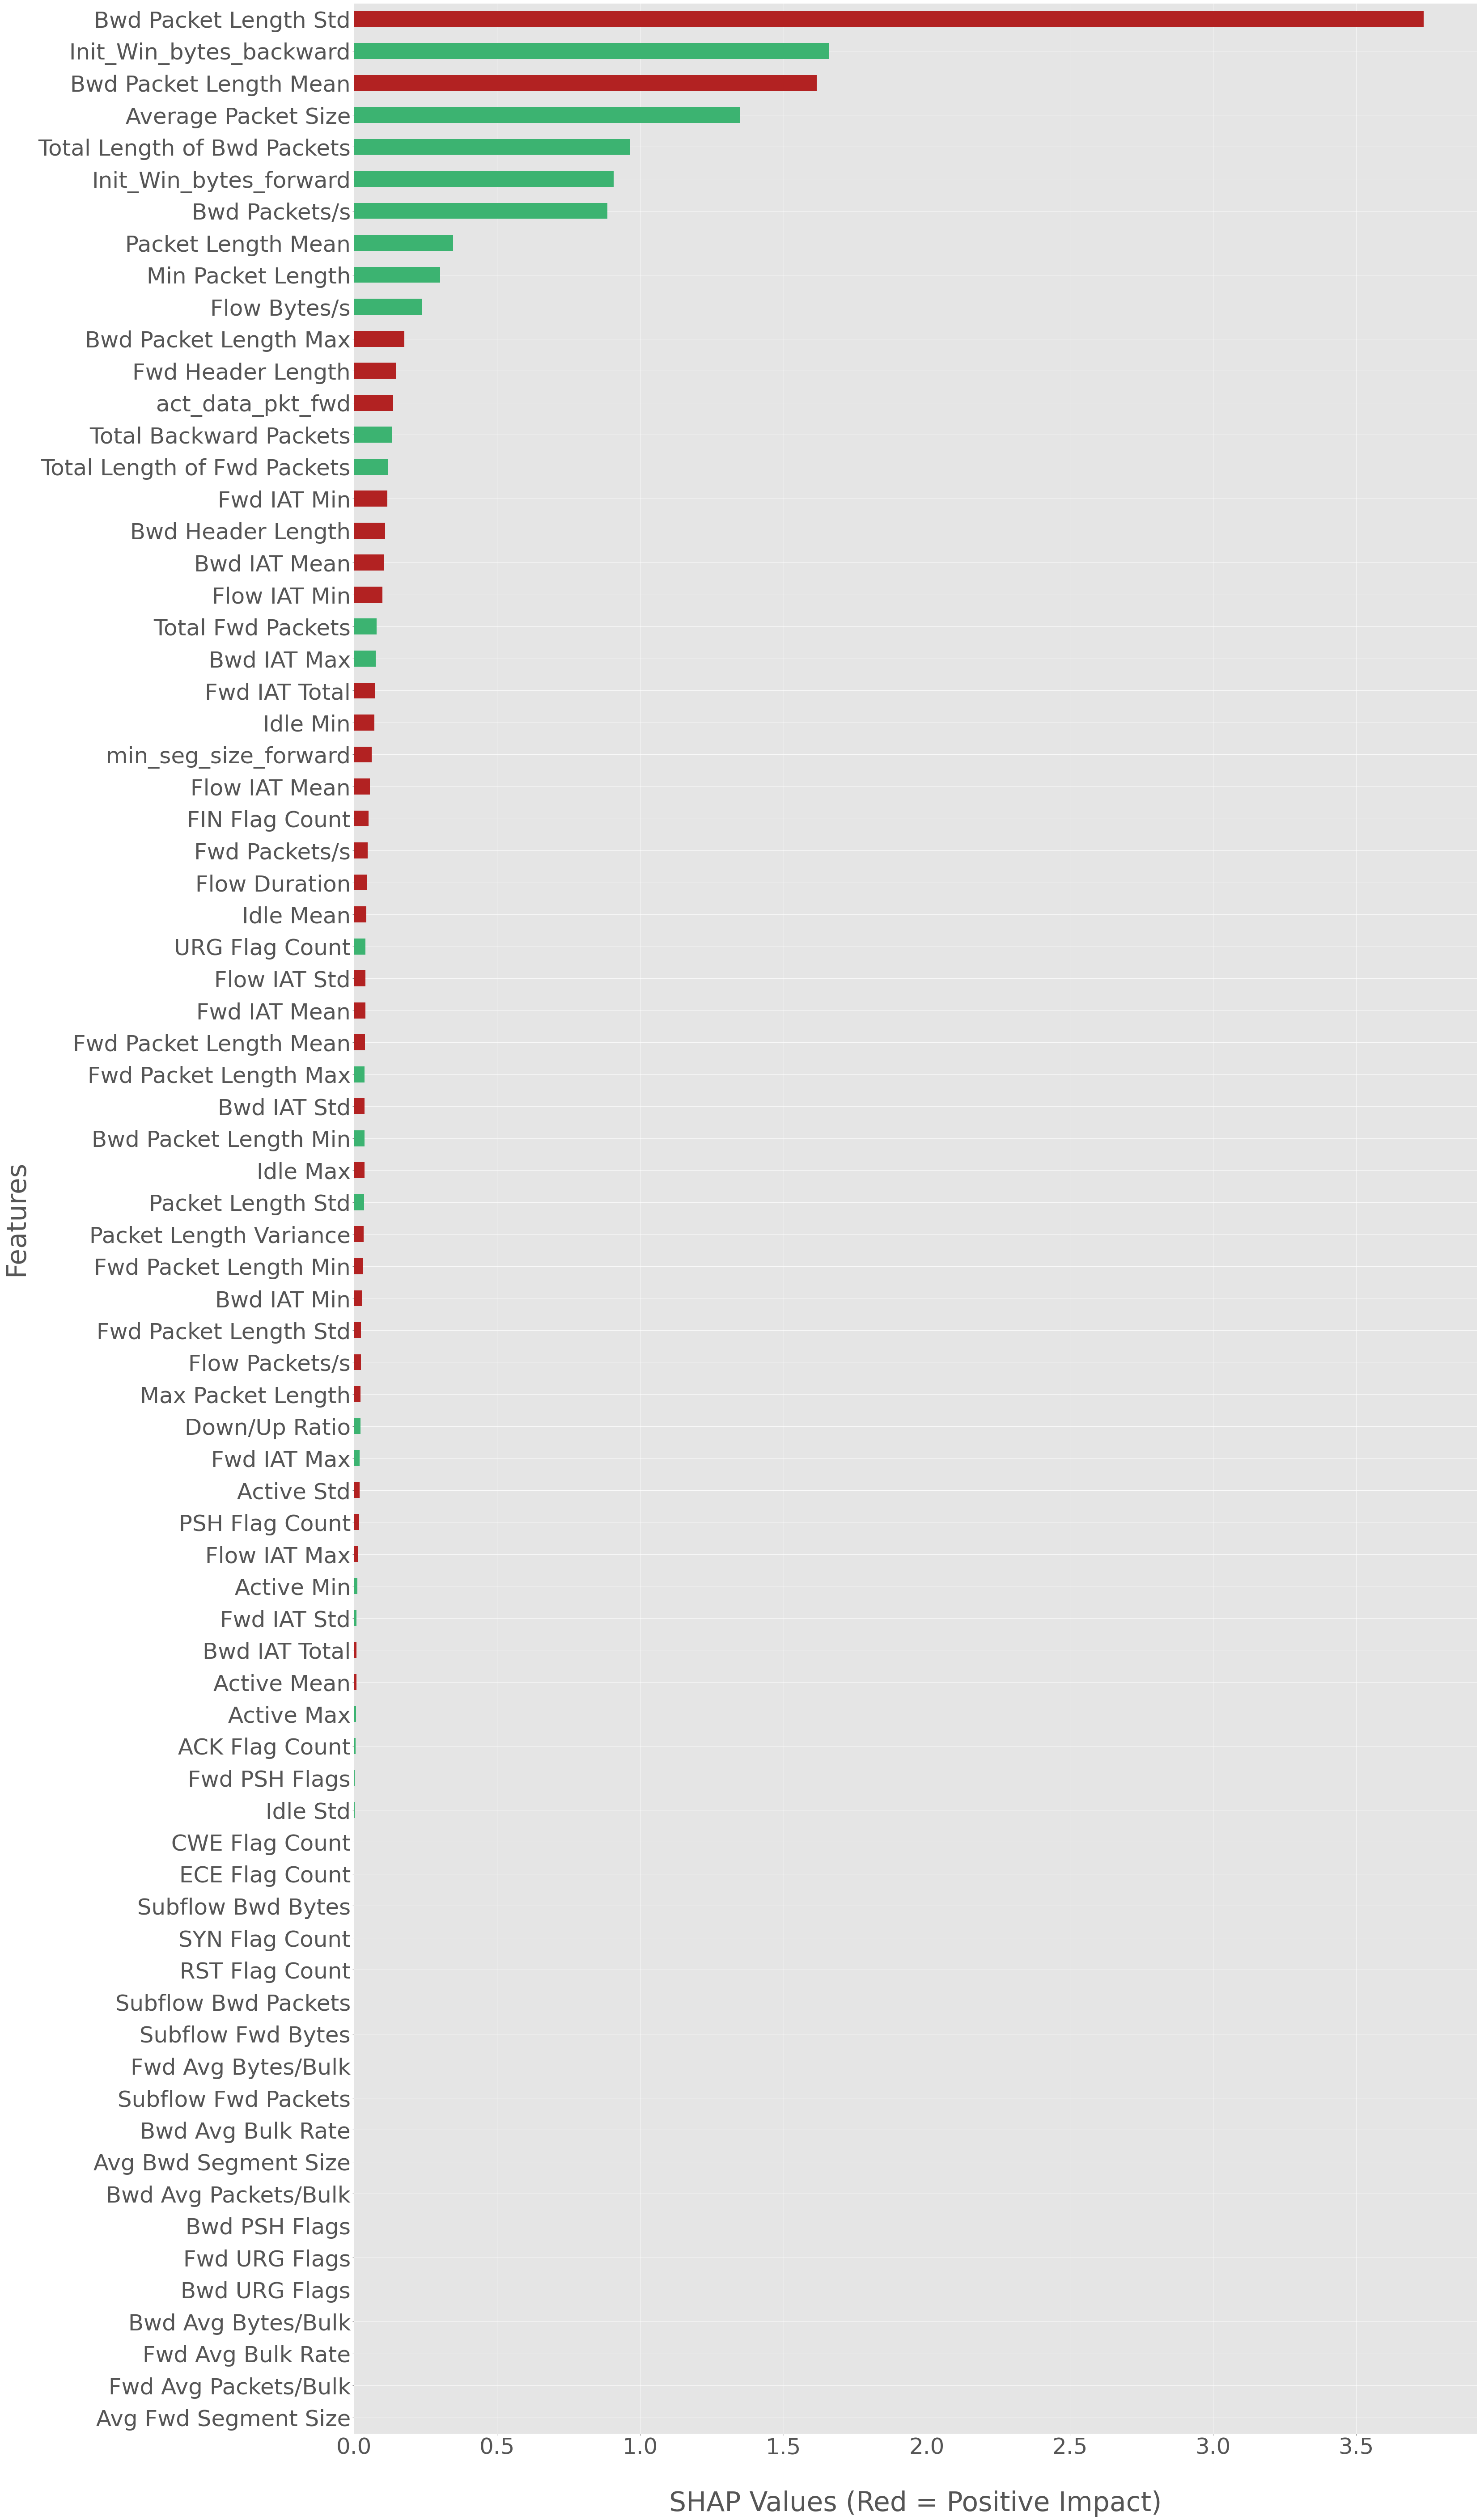

In [46]:
import matplotlib as mpl

mpl.rcParams['font.size']= 50
plt.rcParams["figure.figsize"] = (45,100)

def ABS_SHAP(df_shap,df):
    
    # Make a copy of the input data based on positive outcome (attacks)
    shap_v = pd.DataFrame(df_shap[1])
    df = pd.DataFrame(df)
    feature_list = full_data.columns[0:76]
    shap_v.columns = feature_list
    df.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Features','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'firebrick','mediumseagreen')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Features','Positive Impact on Attack']
    k2 = k.merge(corr_df,left_on = 'Features',right_on='Features',how='inner')
    k2 = k2.sort_values(by='Positive Impact on Attack',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Features',y='Positive Impact on Attack', color = colorlist, figsize=(45,100),legend=False)
    ax.set_xlabel("\nSHAP Values (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_test) 

#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
